In [1]:
# CNN on mnist with convolution visualization

# This is heavily based on keras' example : https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

# This is for the **keras v1** api

In [ ]:
import os
import activations
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu,floatX=float32'
# This gives a 'perform' error in compile
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=gpu1,floatX=float32'
#os.environ['THEANO_FLAGS']='device=gpu0'

#os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=cpu,floatX=float32'

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline

'''
    Train a simple convnet on the MNIST dataset.

    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'\n    Train a simple convnet on the MNIST dataset.\n\n    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py\n\n    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).\n    16 seconds per epoch on a GRID K520 GPU.\n'

In [4]:
np.set_printoptions(precision=5, suppress=True)

In [5]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


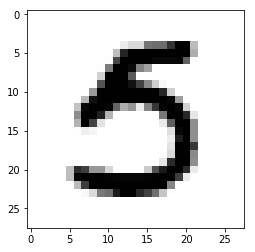

In [6]:
i = 4601
pl.imshow(X_train[i, :,:,0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [48]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='valid', input_shape=X_train.shape[1:]))
# The Dropout is not in the original keras example, it's just here to demonstrate how to
# correctly handle train/predict phase difference when visualizing convolutions below
model.add(Dropout(0.1))
convout1 = Activation('relu')
model.add(convout1)

model.add(Conv2D(32, (3, 3)))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
__________

In [8]:
# Uncomment to visualize
#from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [49]:
WEIGHTS_FNAME = 'mnist_cnn_weights_v1.hdf'
if True and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    model.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    epochs = 12
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, validation_data=(X_test, Y_test))
    model.save_weights(WEIGHTS_FNAME, overwrite=True)
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Loading existing weights
10000/10000 [==============================] - 0s 50us/step
Test score: 0.030721411263
Test accuracy: 0.9893


In [10]:


print(model.predict(X_test[1:5]))
print(Y_test[1:5])

10000/10000 [==============================] - 1s 51us/step
Test score: 0.030721411263
Test accuracy: 0.9893
[[ 0.       0.       1.       0.       0.       0.       0.       0.       0.
   0.     ]
 [ 0.       0.99997  0.       0.       0.00001  0.       0.       0.00001
   0.       0.     ]
 [ 0.99988  0.       0.       0.       0.       0.       0.00009  0.00001
   0.       0.00002]
 [ 0.       0.       0.       0.       0.99999  0.       0.       0.       0.
   0.00001]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [11]:
Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.98      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



## Convolution visualizations

In [13]:
from keras import backend as K

In [14]:
# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + model.inputs
#layer=model.get_layer("dense_one")
layer=convout2
layer_function = K.function(inputs, [layer.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])


In [29]:
W=model.layers[0].get_weights()[0]
print(W.shape)

(3, 3, 1, 32)


In [15]:
# utility functions


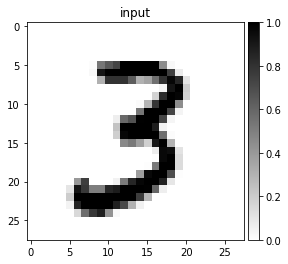

In [16]:
i = 4600

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

pl.figure()
pl.title('input')
activations.nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

In [42]:


#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

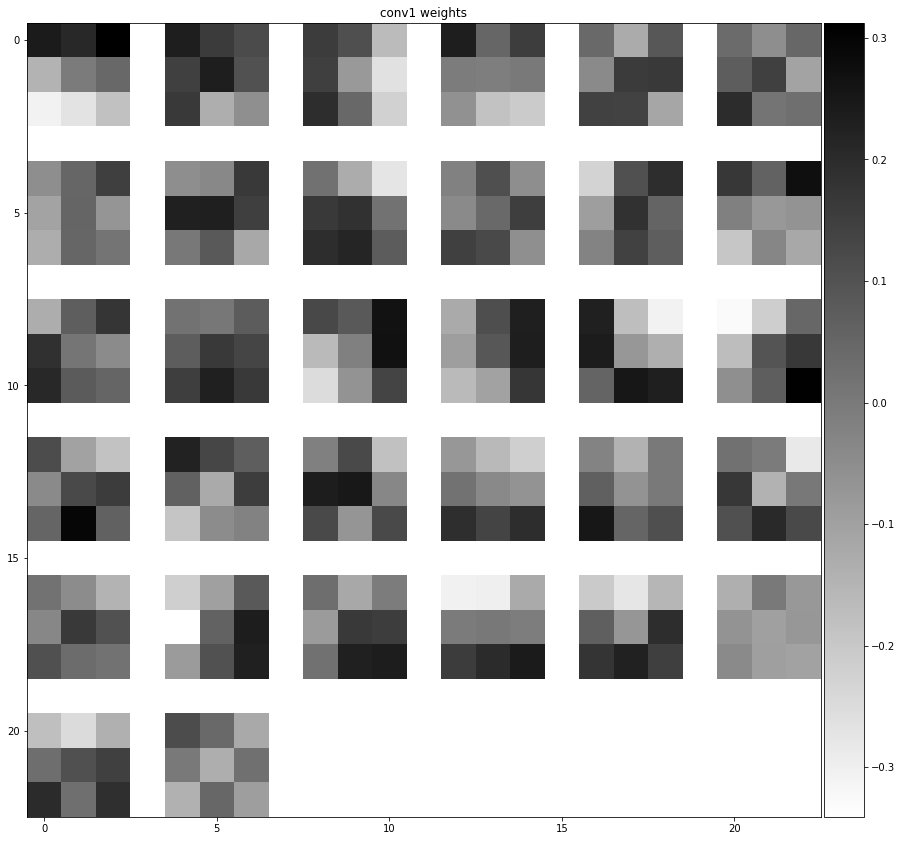

In [45]:
# Visualize weights

W=model.layers[0].get_weights()[0]

W = np.squeeze(W)
filters=W.shape[-1]
columns=6
rows=filters//columns + (min(1,filters % columns))
pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
activations.nice_imshow(pl.gca(), activations.make_mosaic(W, rows, columns), cmap=cm.binary)

In [ ]:
# Visualize convolution result (after activation)
C1 = convout1_f(X)
C1 = np.squeeze(C1)

print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
activations.nice_imshow(pl.gca(), activations.make_mosaic(C1, rows, columns), cmap=cm.binary)